# Import data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio
import fiona
from rasterstats import zonal_stats

# Workaround for an error when reading shapefiles with geopandas
import shapely
shapely.speedups.disable()

# Set DataFrame display size
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [2]:
# Current work directory
wd = 'C:/TEMP/adba7123/masterprojektet/'

### Read and import the Sentinel 2 imagery

In [ ]:
# Paths to Sentinel 2 images taken on 6 June 2019
sen2_20190606_1 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33UUB_20190606T134450.SAFE/GRANULE/L2A_T33UUB_A020654_20190606T102358/IMG_DATA/',
                  'T33UUB_20190606T102031_']
sen2_20190606_2 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33UVB_20190606T134450.SAFE/GRANULE/L2A_T33UVB_A020654_20190606T102358/IMG_DATA/',
                  'T33UVB_20190606T102031_']
sen2_20190606_3 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUC_20190606T134450.SAFE/GRANULE/L2A_T33VUC_A020654_20190606T102358/IMG_DATA/',
                  'T33VUC_20190606T102031_']
sen2_20190606_4 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUD_20190606T134450.SAFE/GRANULE/L2A_T33VUD_A020654_20190606T102358/IMG_DATA/',
                  'T33VUD_20190606T102031_']
sen2_20190606_5 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUE_20190606T134450.SAFE/GRANULE/L2A_T33VUE_A020654_20190606T102358/IMG_DATA/',
                  'T33VUE_20190606T102031_']
sen2_20190606_6 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVC_20190606T134450.SAFE/GRANULE/L2A_T33VVC_A020654_20190606T102358/IMG_DATA/',
                  'T33VVC_20190606T102031_']
sen2_20190606_7 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVD_20190606T134450.SAFE/GRANULE/L2A_T33VVD_A020654_20190606T102358/IMG_DATA/',
                  'T33VVD_20190606T102031_']
sen2_20190606_8 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVE_20190606T134450.SAFE/GRANULE/L2A_T33VVE_A020654_20190606T102358/IMG_DATA/',
                  'T33VVE_20190606T102031_']
sen2_20190606_9 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVF_20190606T134450.SAFE/GRANULE/L2A_T33VVF_A020654_20190606T102358/IMG_DATA/',
                  'T33VVF_20190606T102031_']
sen2_20190606_10 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVG_20190606T134450.SAFE/GRANULE/L2A_T33VVG_A020654_20190606T102358/IMG_DATA/',
                   'T33VVG_20190606T102031_']
sen2_20190606_11 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWC_20190606T134450.SAFE/GRANULE/L2A_T33VWC_A020654_20190606T102358/IMG_DATA/',
                   'T33VWC_20190606T102031_']
sen2_20190606_12 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWD_20190606T134450.SAFE/GRANULE/L2A_T33VWD_A020654_20190606T102358/IMG_DATA/',
                   'T33VWD_20190606T102031_']
sen2_20190606_13 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWF_20190606T134450.SAFE/GRANULE/L2A_T33VWF_A020654_20190606T102358/IMG_DATA/',
                   'T33VWF_20190606T102031_']
sen2_20190606_14 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWG_20190606T134450.SAFE/GRANULE/L2A_T33VWG_A020654_20190606T102358/IMG_DATA/',
                   'T33VWG_20190606T102031_']
sen2_20190606_15 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXF_20190606T134450.SAFE/GRANULE/L2A_T33VXF_A020654_20190606T102358/IMG_DATA/',
                   'T33VXF_20190606T102031_']
sen2_20190606_16 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXG_20190606T124321.SAFE/GRANULE/L2A_T33VXG_A020654_20190606T102025/IMG_DATA/',
                   'T33VXG_20190606T102031_']
sen2_20190606_17 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXG_20190606T134450.SAFE/GRANULE/L2A_T33VXG_A020654_20190606T102358/IMG_DATA/',
                   'T33VXG_20190606T102031_']
# Faulty image, waiting to see if it is retriveble in the future (051021)
#sen2_20190606_18 = [] 


sen2_20190606_paths = [sen2_20190606_1, sen2_20190606_2, sen2_20190606_3, sen2_20190606_4, sen2_20190606_5,
                       sen2_20190606_6, sen2_20190606_7, sen2_20190606_8, sen2_20190606_9, sen2_20190606_10,
                       sen2_20190606_11, sen2_20190606_12, sen2_20190606_13, sen2_20190606_14, sen2_20190606_15, 
                       sen2_20190606_16, sen2_20190606_17]#, sen2_20190606_18]

In [ ]:
# Paths to Sentinel 2 images taken on 26 July 2019
sen2_20190726_1 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33UUB_20190726T125507.SAFE/GRANULE/L2A_T33UUB_A021369_20190726T102028/IMG_DATA/',
                  'T33UUB_20190726T102031_']
sen2_20190726_2 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33UVB_20190726T125507.SAFE/GRANULE/L2A_T33UVB_A021369_20190726T102028/IMG_DATA/',
                  'T33UVB_20190726T102031_']
sen2_20190726_3 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VUC_20190726T125507.SAFE/GRANULE/L2A_T33VUC_A021369_20190726T102028/IMG_DATA/',
                  'T33VUC_20190726T102031_']
sen2_20190726_4 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VUD_20190726T125507.SAFE/GRANULE/L2A_T33VUD_A021369_20190726T102028/IMG_DATA/',
                  'T33VUD_20190726T102031_']
sen2_20190726_5 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVC_20190726T125507.SAFE/GRANULE/L2A_T33VVC_A021369_20190726T102028/IMG_DATA/',
                  'T33VVC_20190726T102031_']
sen2_20190726_6 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVD_20190726T125507.SAFE/GRANULE/L2A_T33VVD_A021369_20190726T102028/IMG_DATA/',
                  'T33VVD_20190726T102031_']
sen2_20190726_7 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVE_20190726T125507.SAFE/GRANULE/L2A_T33VVE_A021369_20190726T102028/IMG_DATA/',
                  'T33VVE_20190726T102031_']
sen2_20190726_8 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVF_20190726T125507.SAFE/GRANULE/L2A_T33VVF_A021369_20190726T102028/IMG_DATA/',
                  'T33VVF_20190726T102031_']
sen2_20190726_9 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVG_20190726T125507.SAFE/GRANULE/L2A_T33VVG_A021369_20190726T102028/IMG_DATA/',
                  'T33VVG_20190726T102031_']
sen2_20190726_10 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWC_20190726T125507.SAFE/GRANULE/L2A_T33VWC_A021369_20190726T102028/IMG_DATA/',
                  'T33VWC_20190726T102031_']
sen2_20190726_11 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWD_20190726T125507.SAFE/GRANULE/L2A_T33VWD_A021369_20190726T102028/IMG_DATA/',
                  'T33VWD_20190726T102031_']
sen2_20190726_12 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWE_20190726T125507.SAFE/GRANULE/L2A_T33VWE_A021369_20190726T102028/IMG_DATA/',
                  'T33VWE_20190726T102031_']
sen2_20190726_13 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWF_20190726T125507.SAFE/GRANULE/L2A_T33VWF_A021369_20190726T102028/IMG_DATA/',
                  'T33VWF_20190726T102031_']
sen2_20190726_14 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWG_20190726T125507.SAFE/GRANULE/L2A_T33VWG_A021369_20190726T102028/IMG_DATA/',
                  'T33VWG_20190726T102031_']
sen2_20190726_15 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWF_20190726T125507.SAFE/GRANULE/L2A_T33VWF_A021369_20190726T102028/IMG_DATA/',
                  'T33VWF_20190726T102031_']
sen2_20190726_16 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VXF_20190726T125507.SAFE/GRANULE/L2A_T33VXF_A021369_20190726T102028/IMG_DATA/',
                  'T33VXF_20190726T102031_']
sen2_20190726_17 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VXG_20190726T125507.SAFE/GRANULE/L2A_T33VXG_A021369_20190726T102028/IMG_DATA/',
                  'T33VXG_20190726T102031_']


sen2_20190726_paths = [sen2_20190726_1, sen2_20190726_2, sen2_20190726_3, sen2_20190726_4, sen2_20190726_5,
                       sen2_20190726_6, sen2_20190726_7, sen2_20190726_8, sen2_20190726_9, sen2_20190726_10,
                       sen2_20190726_11, sen2_20190726_12, sen2_20190726_13, sen2_20190726_14, sen2_20190726_15, 
                       sen2_20190726_16, sen2_20190726_17]

In [ ]:
# Paths to Sentinel 2 images taken on 25 August 2019
sen2_20190825_1 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33UUB_20190825T134836.SAFE/GRANULE/L2A_T33UUB_A021798_20190825T102430/IMG_DATA/',
                  'T33UUB_20190825T102031_']
sen2_20190825_2 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33UVB_20190825T134836.SAFE/GRANULE/L2A_T33UVB_A021798_20190825T102430/IMG_DATA/',
                  'T33UVB_20190825T102031_']
sen2_20190825_3 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUC_20190825T134836.SAFE/GRANULE/L2A_T33VUC_A021798_20190825T102430/IMG_DATA/',
                  'T33VUC_20190825T102031_']
sen2_20190825_4 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUD_20190825T134836.SAFE/GRANULE/L2A_T33VUD_A021798_20190825T102430/IMG_DATA/',
                  'T33VUD_20190825T102031_']
sen2_20190825_5 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUE_20190825T134836.SAFE/GRANULE/L2A_T33VUE_A021798_20190825T102430/IMG_DATA/',
                  'T33VUE_20190825T102031_']
sen2_20190825_6 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVC_20190825T134836.SAFE/GRANULE/L2A_T33VVC_A021798_20190825T102430/IMG_DATA/',
                  'T33VVC_20190825T102031_']
sen2_20190825_7 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVD_20190825T134836.SAFE/GRANULE/L2A_T33VVD_A021798_20190825T102430/IMG_DATA/',
                  'T33VVD_20190825T102031_']
sen2_20190825_8 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVE_20190825T125359.SAFE/GRANULE/L2A_T33VVE_A021798_20190825T102025/IMG_DATA/',
                  'T33VVE_20190825T102031_']
sen2_20190825_9 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVE_20190825T134836.SAFE/GRANULE/L2A_T33VVE_A021798_20190825T102430/IMG_DATA/',
                  'T33VVE_20190825T102031_']
sen2_20190825_10 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVF_20190825T125359.SAFE/GRANULE/L2A_T33VVF_A021798_20190825T102025/IMG_DATA/',
                   'T33VVF_20190825T102031_']
sen2_20190825_11 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVG_20190825T125359.SAFE/GRANULE/L2A_T33VVG_A021798_20190825T102025/IMG_DATA/',
                   'T33VVG_20190825T102031_']
sen2_20190825_12 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWC_20190825T134836.SAFE/GRANULE/L2A_T33VWC_A021798_20190825T102430/IMG_DATA/',
                   'T33VWC_20190825T102031_']
sen2_20190825_13 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWD_20190825T134836.SAFE/GRANULE/L2A_T33VWD_A021798_20190825T102430/IMG_DATA/',
                   'T33VWD_20190825T102031_']
sen2_20190825_14 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWE_20190825T125359.SAFE/GRANULE/L2A_T33VWE_A021798_20190825T102025/IMG_DATA/',
                   'T33VWE_20190825T102031_']
sen2_20190825_15 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWE_20190825T134836.SAFE/GRANULE/L2A_T33VWE_A021798_20190825T102430/IMG_DATA/',
                   'T33VWE_20190825T102031_']
sen2_20190825_16 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWF_20190825T125359.SAFE/GRANULE/L2A_T33VWF_A021798_20190825T102025/IMG_DATA/',
                   'T33VWF_20190825T102031_']
sen2_20190825_17 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWG_20190825T125359.SAFE/GRANULE/L2A_T33VWG_A021798_20190825T102025/IMG_DATA/',
                   'T33VWG_20190825T102031_']
sen2_20190825_18 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VXF_20190825T125359.SAFE/GRANULE/L2A_T33VXF_A021798_20190825T102025/IMG_DATA/',
                   'T33VXF_20190825T102031_']
sen2_20190825_19 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VXG_20190825T125359.SAFE/GRANULE/L2A_T33VXG_A021798_20190825T102025/IMG_DATA/',
                   'T33VXG_20190825T102031_']


sen2_20190825_paths = [sen2_20190825_1, sen2_20190825_2, sen2_20190825_3, sen2_20190825_4, sen2_20190825_5,
                       sen2_20190825_6, sen2_20190825_7, sen2_20190825_8, sen2_20190825_9, sen2_20190825_10,
                       sen2_20190825_11, sen2_20190825_12, sen2_20190825_13, sen2_20190825_14, sen2_20190825_15, 
                       sen2_20190825_16, sen2_20190825_17, sen2_20190825_18, sen2_20190825_19]

In [ ]:
def open_sen2_images(path_list):    
    '''Opens images from Sentinel 2 with rasterio given a list of paths and an empty list of dicts. 
    Returns a list of dictionaries. Each list element is an image, each dict key is a band and dict value is
    the path to the band image.
    '''
    
    image_list = [{} for img in path_list]
    
    # What band image in different resolutions to open  
    img10m = ['B02', 'B03', 'B04', 'B08']
    img20m = ['B05', 'B06', 'B07', 'B8A', 'B11', 'B12', 'SCL']  
    driver = 'JP2OpenJPEG'    
    count = 0
    
    for path in path_list:
        
        for band in img10m:
            imagePath10m = path[0] + 'R10m/'
            image_list[count][band] = rasterio.open(imagePath10m+path[1]+(band)+'_10m.jp2',
                                                    driver=driver)
            
        for band in img20m:
            imagePath20m = path[0] + 'R20m/'
            image_list[count][band] = rasterio.open(imagePath20m+path[1]+(band)+'_20m.jp2',
                                                    driver=driver)
        count+=1
        
    return image_list


sen2_20190606_list = open_sen2_images(sen2_20190606_paths)
sen2_20190726_list = open_sen2_images(sen2_20190726_paths)
sen2_20190825_list = open_sen2_images(sen2_20190825_paths)

### Read and import data for semi-natural grasslands

In [ ]:
# CSV file with all semi natural grasslands inventoried in 2019 in Sweden
sng_full = pd.read_csv(wd+'output/sng_full-utf8.csv', low_memory=False)
sng_full_gdf = gpd.GeoDataFrame(sng_full)

In [ ]:
from shapely.geometry import box

def get_bounds(img_list):
    ''' Get the outer most bounds (coodinates) of several rasters.
    Returns a list of these bounds.
    '''
    # Get all bounds into a list. 'B02' is just any arbritary band used for the rasters extent.
    bounds_list = [img_list[x]['B02'].bounds for x in range(len(img_list))]
    
    # Assign the variables to any used raster bound
    left = bounds_list[0][0]
    bottom = bounds_list[0][1]
    right = bounds_list[0][2]
    top = bounds_list[0][3]
    
    for bounds in bounds_list:
        if bounds[0] < left:
            left = bounds[0]
        if bounds[1] < bottom:
            bottom = bounds[1]
        if bounds[2] > right:
            right = bounds[2]
        if bounds[3] > top:
            top = bounds[3]

    return [left, bottom, right, top]


bounds = get_bounds(sen2_20190726_list)
bbox = box(*bounds)

# Imports polygons over semi-natural grasslands inventoried 2019 within the defined bounds
aob = gpd.read_file(wd + 'data/Angs-och-betesmarksinventeringen/AoB_2019.shp', 
                    bbox=bbox, within=True)
aob = aob.to_crs(epsg=32633) # Sets crs to WGS 84 / UTM zone 33N, same as the Sentinel 2 imagery

In [ ]:
# Merge the csv with the shapefile (linking the data to geographical space)
sng_data = aob.merge(sng_full_gdf, on='FältID')

# Calculations

#### Cloud mask

In [ ]:
def percent_good_pixels(df):
    '''Calculates the percent of targeted pixels in a polygon from a df.
    Returns a list with percentages
    '''
    good_pixel_list = [0] * len(df[0])
    good_pixels = 0
    
    for img in range(len(df)):
        
        for poly in range(len(df[0])):
            good_pixels = (df[img].iloc[poly][4] #vegetation class
                           / df[img].iloc[poly].sum())
            if good_pixels > good_pixel_list[poly]:
                good_pixel_list[poly] = good_pixels
                
    return good_pixel_list

def remove_bad_polygons(df, img_list):
    '''Using the Scene classification map inculded in Sentinel 2 level 2A images to
    first calculate percent of each class per polygon. Secondly to remove instances 
    that has less percent vegetated pixels than a set threshold.
    Returns a df with wanted polygons and a added column with percent vegetated pixels
    '''

    percent_limit = 0.90
    
    result_list = []
    
    for img in range(len(img_list)):
        print('Processing image{}'.format(img+1))
        result = gpd.GeoDataFrame(zonal_stats(df, img_list[img]['SCL'].name, categorical=True, nodata=-999))
        result = result.fillna(0)
        result_list.append(result)
        
    print('Processing images done! Calculating % good pixels')
    
    df['Percent good pixels'] = percent_good_pixels(result_list)
    
    df = df[df['Percent good pixels'] > percent_limit]
    print('Done!')
    
    return df


sng_data_20190606 = remove_bad_polygons(sng_data, sen2_20190606_list)
sng_data_20190726 = remove_bad_polygons(sng_data, sen2_20190726_list)
sng_data_20190825 = remove_bad_polygons(sng_data, sen2_20190825_list)

In [ ]:
# Add a date column
sng_data_20190606['Date'] = '20190606'
sng_data_20190726['Date'] = '20190726'
sng_data_20190825['Date'] = '20190825'

#### Zonal statistics

In [ ]:
def obtain_band_stats(df, img_list):
    """ Calculates the targeted zonal statistics for each band in every semi-natural grasslands.
    Returns a dataframe containing the original data and the calculated zonal statistics.
    """ 
    
    stat_df = gpd.GeoDataFrame()
    stats = ['median', 'mean', 'std'] # Statistic to calculate   
    band_list = [band for band in img_list[0]]
    band_list.remove('SCL')
    
    for stat in stats:
        
        for band in band_list:
            result_list = []
            band_stat_list = []
            
            for img in range(len(img_list)):
                print('Processing image{}, {}, {} values'.format(img+1, band, stat))
                result = gpd.GeoDataFrame(zonal_stats(df, img_list[img][band].name, stats=stat, nodata=-999))
                result_list.append(result)

            # Create a single list with max band value per polygon
            # if there is a polygon that overlaps images, the one with the highest values is chosen
            for polygon in range(len(result_list[0])):
                band_value = 0
                
                for img2 in range(len(result_list)):
                    if band_value < result_list[img2][stat][polygon]:
                        band_value = result_list[img2][stat][polygon]
                band_stat_list.append(band_value) 
                
            stat_df["{}_{}".format(band, stat)] = band_stat_list
            
    df = df.merge(stat_df, left_index=True, right_index=True)
    print('Done!')
    
    return df


sng_data_20190606 = obtain_band_stats(sng_data_20190606, sen2_20190606_list)
sng_data_20190726 = obtain_band_stats(sng_data_20190726, sen2_20190726_list)
sng_data_20190825 = obtain_band_stats(sng_data_20190825, sen2_20190825_list)

#### NDVI

In [ ]:
def calc_ndvi(df, img_list):
    ''' Calculates NDVI per pixel in all semi-natural grasslands.
    Returns a dataframe containing the original data and the calculated NDVI statistics.
    '''
    
    stats = ['mean', 'std']
    stat_df = gpd.GeoDataFrame()
    result_list = []
    
    for img in range(len(img_list)):                
        print('Calculating NDVI values for img {} of {}'.format(img+1, len(img_list)))
        red = img_list[img]['B04'].read(1)
        nir = img_list[img]['B08'].read(1) 
        np.seterr(divide='ignore', invalid='ignore')      
        ndvi_array = ((nir.astype(float) - red.astype(float)) / (nir + red))
        affine = img_list[img]['B02'].transform
        result = gpd.GeoDataFrame(zonal_stats(sng_data, ndvi_array, stats=stats, affine=affine, nodata=-999))
        result_list.append(result)
        
    # Create a single list with max band value per polygon
    # if there is a polygon that overlaps images, the one with the highest values is chosen        
    for stat in stats:
        band_stat_list = []
        
        for polygon in range(len(result_list[0])):
            band_value = 0
            
            for img2 in range(len(result_list)):
                if band_value < result_list[img2][stat][polygon]:
                    band_value = result_list[img2][stat][polygon]
            band_stat_list.append(band_value)

        stat_df['NDVI_'+stat] = band_stat_list
                        
    df = df.merge(stat_df, left_index=True, right_index=True)
    print('Done!')
    return df

sng_data_20190606 = calc_ndvi(sng_data_20190606, sen2_20190606_list)
sng_data_20190606.to_file(wd+"temp/sng_data_20190606_stats_ndvi_030921.geojson", driver='GeoJSON')

sng_data_20190726 = calc_ndvi(sng_data_20190726, sen2_20190726_list)
sng_data_20190726.to_file(wd+"temp/sng_data_20190726_stats_ndvi_030921.geojson", driver='GeoJSON')

sng_data_20190825 = calc_ndvi(sng_data_20190825, sen2_20190825_list)
sng_data_20190825.to_file(wd+"temp/sng_data_20190825_stats_ndvi_030921.geojson", driver='GeoJSON')

In [ ]:
sng_data = sng_data_20190606.append(sng_data_20190726)
sng_data = sng_data.append(sng_data_20190825)

#### Other calculations

In [ ]:
# Make a list of positive indicator species for semi natural grasslands retrived from
# "Ängs- och betesmarksinventeringen: Metodik för inventering från och med 2016, Rapport 2017:9"
with open('data/positiva_signalarter.txt', 'r') as reader:
    pos_species = reader.readlines()
    pos_species = [x.strip() for x in pos_species] 

In [ ]:
def tot_non_zero(df):
    '''Counts the total number of non-zero features within the columns of a dataframe.
    Returns the df and a column with targeted counted features.
    '''
    df['indicator_species'] = np.count_nonzero(df[pos_species], axis=1)
    return df

def get_coordinates(gdf):
    """Obtaines the centroid coordinates of polygons in a GeoDataFrame.
    Returns the gdf containing the original data and longitude and latitude for each polygon
    """
    gdf['lon'] = gdf.centroid.x
    gdf['lat'] = gdf.centroid.y
    return gdf

def calc_area(gdf):
    '''Calculates the area of all polygons in a GeoDataFrame.
    Returns the gdf and values of the area'''
    gdf['area'] = gdf['geometry'].area
    return gdf


sng_data = get_coordinates(sng_data)
sng_data = calc_area(sng_data)
sng_data = tot_non_zero(sng_data)

## Write/read data

In [ ]:
# Inserts a random number column to compare features importance with later on
sng_data['randNumCol'] = np.random.randint(1, 1000, sng_data.shape[0])

In [ ]:
# Set feature and target columns 
features = ['B02_mean', 'B03_mean', 'B04_mean', 'B05_mean', 'B06_mean', 
            'B07_mean', 'B08_mean', 'B8A_mean', 'B11_mean', 'B12_mean',
            'B02_std', 'B03_std', 'B04_std', 'B05_std', 'B06_std', 
            'B07_std', 'B08_std', 'B8A_std', 'B11_std', 'B12_std',
            'B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 
            'B07_median', 'B08_median', 'B8A_median', 'B11_median', 'B12_median',
            'NDVI_mean','NDVI_std', 'randNumCol', 'area' , 'lon', 'lat']

target = ['indicator_species']

Save

In [ ]:
sng_data_write = sng_data[['FALTID'] + ['Date'] + target + features + ['geometry']]
sng_data_write.to_file(wd+"temp/sng_data_031521.shp")

Load

In [3]:
sng_data = gpd.read_file(wd+'temp/sng_data_031021.shp')

# Shapefiles limits the column names to 10 chars, so this is to revert them to the original names.
sng_data = sng_data.rename(columns={'indicator_' : 'indicator_species'})

# Managing data

In [4]:
# Set all feature and target columns 
features = ['B02_mean', 'B03_mean', 'B04_mean', 'B05_mean', 'B06_mean', 
            'B07_mean', 'B08_mean', 'B8A_mean', 'B11_mean', 'B12_mean',
            'B02_std', 'B03_std', 'B04_std', 'B05_std', 'B06_std', 
            'B07_std', 'B08_std', 'B8A_std', 'B11_std', 'B12_std',
            'B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 
            'B07_median', 'B08_median', 'B8A_median', 'B11_median', 'B12_median',
            'NDVI_mean','NDVI_std', 'randNumCol', 
            'area' , 'lon', 'lat']

target = ['indicator_species']

In [5]:
# Removes all rows that contains 0 values on the measured features
print(len(sng_data))
sng_data = sng_data[(sng_data[features] != 0).all(axis=1)]
print(len(sng_data))

4452
4422


#### Get mean values for every polygon across all dates

In [6]:
for feature in features:
    sng_data.loc[:, str(feature)+ "_encoded"] = sng_data.groupby("FALTID")[feature].transform("mean")
print(len(sng_data))
print(sng_data['FALTID'].nunique())

4422
2293


#### Remove duplicates (if encoded features are used)

In [7]:
sng_data = sng_data.set_index('FALTID')
sng_data = sng_data[~sng_data.index.duplicated(keep='first')]

# Explore the data

In [8]:
# Ignores DataConversionWarnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# warnings.resetwarnings()

In [9]:
# Set feature and target columns if using encoded data
features = ['B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_std_encoded', 'NDVI_mean_encoded', 'randNumCol_encoded', 
            'area_encoded' , 'lon_encoded', 'lat_encoded']

target = ['indicator_species']

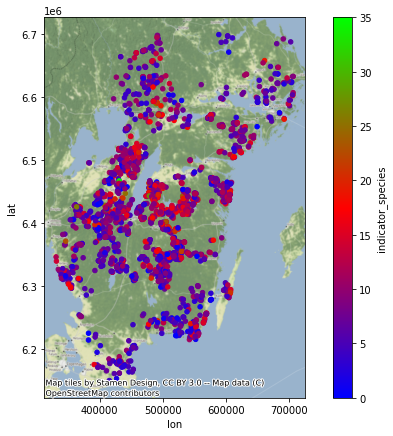

In [10]:
import matplotlib as mpl
import contextily as ctx

gdf = sng_data
df = pd.DataFrame(gdf)


# Få en figur till uppsatsen. Spridningen av betesmarker och pos_spec över studieområdet
ax = df.plot(kind="scatter", x="lon", y="lat", alpha=1,
              figsize=(10,7),
              c='indicator_species', cmap=plt.get_cmap("brg"), colorbar=True,
              sharex=False)
ctx.add_basemap(ax, crs='epsg:32633')
plt.show()

In [11]:
sng_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2293 entries, PBM-OCH to KLE-EZR
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                2293 non-null   object  
 1   indicator_species   2293 non-null   int64   
 2   vascular_p          2293 non-null   int64   
 3   B02_mean            2293 non-null   float64 
 4   B03_mean            2293 non-null   float64 
 5   B04_mean            2293 non-null   float64 
 6   B05_mean            2293 non-null   float64 
 7   B06_mean            2293 non-null   float64 
 8   B07_mean            2293 non-null   float64 
 9   B08_mean            2293 non-null   float64 
 10  B8A_mean            2293 non-null   float64 
 11  B11_mean            2293 non-null   float64 
 12  B12_mean            2293 non-null   float64 
 13  B02_std             2293 non-null   float64 
 14  B03_std             2293 non-null   float64 
 15  B04_std             2293 n

In [12]:
sng_data.head()

,Date,indicator_species,vascular_p,B02_mean,B03_mean,B04_mean,B05_mean,B06_mean,B07_mean,B08_mean,B8A_mean,B11_mean,B12_mean,B02_std,B03_std,...,B03_median_encoded,B04_median_encoded,B05_median_encoded,B06_median_encoded,B07_median_encoded,B08_median_encoded,B8A_median_encoded,B11_median_encoded,B12_median_encoded,NDVI_mean_encoded,NDVI_std_encoded,randNumCol_encoded,area_encoded,lon_encoded,lat_encoded
FALTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBM-OCH,20190606,3,3,401.200000,579.960000,395.960000,928.142857,2294.285714,2706.285714,2716.720000,3007.571429,1948.571429,1035.285714,29.926577,62.545011,...,442.333333,327.666667,790.000000,2023.666667,2424.333333,2466.666667,2774.666667,1729.000000,850.333333,0.763515,0.027049,555.000000,2411.962066,461987.194587,6.421710e+06
654-WGU,20190606,14,23,313.054286,539.415714,360.880000,925.807910,2366.564972,2780.774011,2883.400000,3060.570621,1722.050847,860.231638,55.930645,75.779549,...,538.000000,343.000000,932.000000,2408.000000,2829.000000,2941.000000,3115.000000,1759.000000,845.000000,0.772456,0.069179,460.000000,69660.705292,543519.274658,6.217067e+06
D26-JJR,20190606,12,14,538.436195,741.491879,535.865429,1150.700000,2956.709091,3626.772727,3707.048724,4019.263636,2349.563636,1220.781818,91.232753,123.096247,...,572.666667,386.000000,961.500000,2641.666667,3201.666667,3378.000000,3580.666667,2024.166667,999.333333,0.778431,0.053690,664.333333,51928.663794,461394.359190,6.422803e+06
RAO-CEO,20190606,11,14,496.068966,713.793103,468.862069,1133.642857,3087.071429,3736.000000,3934.275862,4120.428571,2153.214286,1056.000000,107.579620,124.272886,...,568.500000,345.000000,1003.666667,2703.833333,3259.333333,3497.000000,3679.166667,1951.666667,919.500000,0.782399,0.067678,640.333333,43011.880952,490162.567825,6.418280e+06
QJW-ZHG,20190606,11,12,362.910959,579.191781,357.260274,922.432432,2569.432432,2989.621622,3251.342466,3291.729730,2025.324324,960.405405,17.364316,35.824595,...,619.500000,430.333333,1019.000000,2465.000000,2878.000000,3078.333333,3302.333333,2293.333333,1160.000000,0.800798,0.076912,618.000000,5698.467853,490424.484969,6.416459e+06


In [13]:
sng_data.describe()

,indicator_species,vascular_p,B02_mean,B03_mean,B04_mean,B05_mean,B06_mean,B07_mean,B08_mean,B8A_mean,B11_mean,B12_mean,B02_std,B03_std,B04_std,...,B03_median_encoded,B04_median_encoded,B05_median_encoded,B06_median_encoded,B07_median_encoded,B08_median_encoded,B8A_median_encoded,B11_median_encoded,B12_median_encoded,NDVI_mean_encoded,NDVI_std_encoded,randNumCol_encoded,area_encoded,lon_encoded,lat_encoded
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,...,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2.293000e+03,2293.000000,2.293000e+03
mean,8.784998,15.021369,363.248095,584.538093,422.270353,984.035064,2544.832472,3031.549687,3131.862148,3352.818653,1948.113102,984.377983,68.288735,100.241591,105.606940,...,548.853358,393.347907,947.020461,2438.041430,2901.418084,3028.120911,3230.107065,1929.005887,965.986372,0.727100,0.056699,503.783908,2.666387e+04,493748.642935,6.421499e+06
std,4.796878,8.656726,116.281818,129.824336,122.440202,193.685402,464.048965,562.177425,572.613116,598.906986,371.978072,234.373756,54.313345,47.292332,53.213983,...,96.295870,94.253958,153.797564,329.759809,390.963700,406.737031,419.625784,298.311078,188.593005,0.110956,0.023469,227.212594,5.584551e+04,74647.284345,1.096464e+05
min,0.000000,0.000000,103.578947,190.684211,110.684211,287.111111,819.805195,979.792208,971.025723,1017.571429,371.493506,165.259740,11.860298,9.957284,12.381516,...,190.500000,107.500000,275.000000,848.000000,1017.000000,1040.000000,1079.000000,423.000000,207.000000,0.024489,0.006770,1.000000,5.499511e+02,331077.948925,6.149946e+06
25%,5.000000,9.000000,280.833333,494.242424,336.641711,857.420168,2257.235294,2685.072581,2791.586207,2994.000000,1737.018868,836.219799,44.871022,74.167002,73.397483,...,484.500000,329.500000,845.250000,2230.750000,2657.500000,2789.000000,2979.000000,1743.750000,842.000000,0.705450,0.041027,343.500000,5.472494e+03,436703.692315,6.345340e+06
50%,8.000000,13.000000,342.652174,571.857143,405.944000,976.900000,2521.977778,3003.800000,3105.526718,3331.602076,1945.888889,966.432432,57.699009,93.499613,95.415790,...,546.500000,384.000000,945.500000,2437.500000,2911.000000,3040.666667,3243.000000,1929.000000,955.000000,0.755687,0.052183,502.500000,1.260292e+04,489733.835025,6.419396e+06
75%,12.000000,20.000000,421.527778,661.220000,490.364130,1101.575758,2838.840909,3380.691667,3480.545455,3718.026316,2174.859155,1111.333333,75.751237,116.025170,126.731049,...,608.166667,447.000000,1042.000000,2646.500000,3142.500000,3287.000000,3494.000000,2103.000000,1073.000000,0.790560,0.067337,667.500000,2.804347e+04,537864.197011,6.480500e+06
max,35.000000,55.000000,1318.745098,1254.372549,997.307692,1781.750000,4459.000000,5106.750000,5187.466667,5501.750000,3682.738318,2232.500000,1155.830401,665.201077,682.178414,...,947.000000,809.000000,1628.000000,3616.000000,4425.000000,4520.000000,4739.000000,3723.000000,2147.000000,0.898883,0.230018,996.000000,1.217347e+06,707310.215086,6.698529e+06


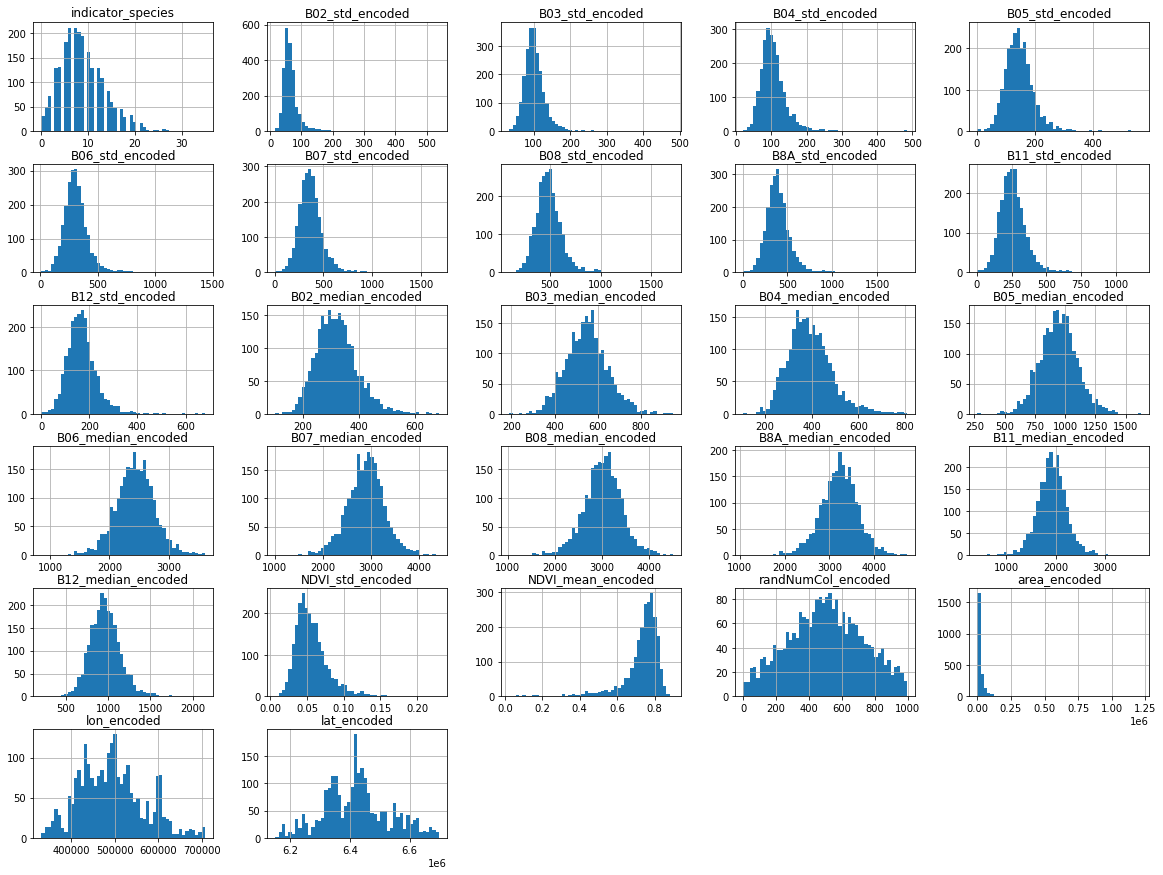

In [14]:
# Creates histograms of the target and feature values
X_y = sng_data[target + features]
X_y.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Visualize Pearson’s r correlations
sng_corr = sng_data[features + target]
corr_matrix = sng_corr.corr()
corr_list = corr_matrix['indicator_species'].sort_values(ascending=False)
corr_list

indicator_species     1.000000
area_encoded          0.119649
lat_encoded           0.107835
lon_encoded           0.064961
B02_std_encoded       0.030933
NDVI_std_encoded      0.029563
B08_median_encoded    0.008964
B03_std_encoded       0.008156
B07_median_encoded    0.008092
B06_median_encoded    0.007046
B8A_median_encoded    0.006252
B8A_std_encoded       0.004812
B06_std_encoded       0.003586
B07_std_encoded       0.002974
B04_std_encoded      -0.001187
B08_std_encoded      -0.002046
B02_median_encoded   -0.005042
B03_median_encoded   -0.013134
B05_median_encoded   -0.015231
B04_median_encoded   -0.017250
NDVI_mean_encoded    -0.018253
randNumCol_encoded   -0.018705
B12_median_encoded   -0.018993
B12_std_encoded      -0.019385
B11_std_encoded      -0.020261
B05_std_encoded      -0.027610
B11_median_encoded   -0.028063
Name: indicator_species, dtype: float64

### Set features as r > rndft

In [16]:
above_rnd = [x for x in corr_list if x > abs(corr_list['randNumCol_encoded'])]
below_rnd = [x for x in corr_list if x < corr_list['randNumCol_encoded']]

In [17]:
features = (list(corr_list.index[1:len(above_rnd)]))+list(corr_list.index[len(corr_list)-len(below_rnd):])
features

['area_encoded',
 'lat_encoded',
 'lon_encoded',
 'B02_std_encoded',
 'NDVI_std_encoded',
 'B12_median_encoded',
 'B12_std_encoded',
 'B11_std_encoded',
 'B05_std_encoded',
 'B11_median_encoded']

## Mutual information

In [18]:
# Set feature and target columns if using encoded data
features = ['B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_std_encoded', 'NDVI_mean_encoded', 'randNumCol_encoded', 
            'area_encoded' , 'lon_encoded', 'lat_encoded']

target = ['indicator_species']

In [19]:
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [20]:
X = sng_data[features]
y = sng_data[target]

mi_scores = make_mi_scores(X, y)

lat_encoded           0.086850
lon_encoded           0.043902
area_encoded          0.037555
B08_median_encoded    0.027084
B02_std_encoded       0.024774
B05_median_encoded    0.018969
B05_std_encoded       0.014677
B12_median_encoded    0.012775
B03_median_encoded    0.011070
B02_median_encoded    0.009814
B08_std_encoded       0.008904
B04_median_encoded    0.006788
randNumCol_encoded    0.004911
B12_std_encoded       0.004636
B07_std_encoded       0.001036
B03_std_encoded       0.000425
B06_median_encoded    0.000000
B07_median_encoded    0.000000
NDVI_mean_encoded     0.000000
B11_std_encoded       0.000000
B8A_std_encoded       0.000000
B8A_median_encoded    0.000000
B06_std_encoded       0.000000
B11_median_encoded    0.000000
B04_std_encoded       0.000000
NDVI_std_encoded      0.000000
Name: MI Scores, dtype: float64


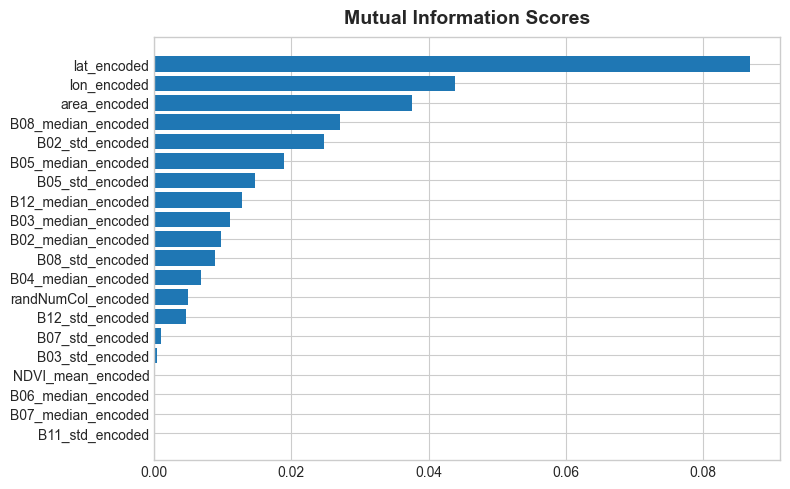

In [21]:
print(mi_scores)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

### Set features with MI scores > rndft

In [22]:
x = [x for x in mi_scores if x > mi_scores['randNumCol_encoded']]
features = list(mi_scores.index[:len(x)])
features

['lat_encoded',
 'lon_encoded',
 'area_encoded',
 'B08_median_encoded',
 'B02_std_encoded',
 'B05_median_encoded',
 'B05_std_encoded',
 'B12_median_encoded',
 'B03_median_encoded',
 'B02_median_encoded',
 'B08_std_encoded',
 'B04_median_encoded']

# MACHINE LEARNING

In [23]:
import tensorflow as tf
import timeit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer
from scipy.stats import randint
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

## Setup

In [24]:
# Set feature and target columns
features = ['B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_std_encoded', 'NDVI_mean_encoded',
            'area_encoded', 'lon_encoded', 'lat_encoded']

target = ['indicator_species']

#### Split the data, 80% for training and validating, 20% for testing

In [25]:
# Sets aside a test set
train_set, test_set = train_test_split(sng_data, test_size=0.2, random_state=0)
print('Number of semi-natural grasslands per set')
print('Train set:', len(train_set))
print('Test set:', len(test_set))

Number of semi-natural grasslands per set
Train set: 1834
Test set: 459


#### Set training and validation data

In [26]:
# Scale all numeric features. Makes it easier for the models to interpret
preprocessor = make_column_transformer((StandardScaler(), features))

# Set the test data
y_test = test_set[target]
X_test = test_set[features].copy()

# Training set when using cross-validation
y = train_set[target]
X = train_set[features].copy()

X_prep = preprocessor.fit_transform(X)
X_test_cv = preprocessor.transform(X_test)

# Split the data in training and validation sets 70/30
# This is for the neural networks that does not work well with cross-validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test_nn = preprocessor.transform(X_test)

# Set binary classes

#### Sets the semi-natural grasslands with 8 or more positive indicator species as True, and those with less than 8 to False

In [27]:
y = (y >= 8)*1 #*1 changes the values from False/True to 0/1
y_test = (y_test >= 8)*1
y_valid = (y_valid >= 8)*1
y_train = (y_train >= 8)*1

# CLASSIFICATION

## Random Forest

### Grid search to optimize hyperparameters

In [ ]:
rnd_clf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [300, 400, 500, 600],
    'max_depth' : [None,4,5,6,7,8,9]
}
rnd_grid = GridSearchCV(rnd_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
rnd_grid.fit(X_prep, y)

In [ ]:
# Narrow down the grid search
rnd_clf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [320,325,330],
    'max_depth': [8]
}
rnd_grid = GridSearchCV(rnd_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
rnd_grid.fit(X_prep, y)

In [ ]:
cvres = rnd_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(rnd_grid.best_estimator_)
print(rnd_grid.best_params_)
print(rnd_grid.best_score_)

## Support Vector Machine

### Grid search to optimize hyperparameters

In [ ]:
svm_clf = SVC(random_state=0)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1,1,5], 'degree': [1,2,3],'coef0': [0.1,1,5], 'gamma': ['scale', 'auto'], 'kernel': ['poly']},
 ]

svm_grid = GridSearchCV(svm_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
svm_grid.fit(X_prep, y)

In [ ]:
# Narrow down the grid search
svm_clf = SVC(random_state=0)
param_grid = [
  {'C': [510, 515, 520], 'gamma': [0.0049, 0.005, 0.0051]},
 ]

svm_grid = GridSearchCV(svm_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
svm_grid.fit(X_prep, y)

In [ ]:
cvres = svm_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(svm_grid.best_estimator_)
print(svm_grid.best_params_)
print(svm_grid.best_score_)

## LogisticRegression

### Grid search to optimize hyperparameters

In [ ]:
log_clf = LogisticRegression(random_state=0, max_iter=1000)
param_grid = {
    'C':[0.01,0.1,1,10,20],
}

log_grid = GridSearchCV(log_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
log_grid.fit(X_prep, y)



In [ ]:
cvres = log_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(log_grid.best_estimator_)
print(log_grid.best_params_)
print(log_grid.best_score_)

## Voting Classifier

In [28]:
# Set which models that the Voting Classifier should include
# Each model has been grid searched for the best hyperparameters
log_clf = LogisticRegression(C=10, max_iter=1000, random_state=0)
rnd_clf = RandomForestClassifier(max_depth=8, n_estimators=325, random_state=0)
svm_clf = SVC(kernel='rbf', C=520, gamma=0.005, random_state=0, probability=True)

voting_clf = VotingClassifier(estimators=
                              [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                               voting='soft',)

In [29]:
# Check accuracy scores for each model
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_prep, y)
    y_pred = clf.predict(X_test_cv)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5969498910675382
RandomForestClassifier 0.644880174291939
SVC 0.5860566448801743
VotingClassifier 0.616557734204793


### Permutation importance for RF, SVM, LR and VC

In [30]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    print(clf.__class__.__name__)
    r = permutation_importance(clf, X_prep, y,
                               n_repeats=30,
                               random_state=0)

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - abs(r.importances_std[i]) > 0:
            print(f"{features[i]:<20}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    print()

LogisticRegression
B11_median_encoded  0.074 +/- 0.008
B12_median_encoded  0.056 +/- 0.009
B11_std_encoded     0.053 +/- 0.009
B05_std_encoded     0.048 +/- 0.008
B06_std_encoded     0.044 +/- 0.007
lat_encoded         0.043 +/- 0.008
B07_std_encoded     0.036 +/- 0.006
B04_std_encoded     0.034 +/- 0.007
B07_median_encoded  0.024 +/- 0.007
B06_median_encoded  0.021 +/- 0.006
B12_std_encoded     0.015 +/- 0.006
area_encoded        0.014 +/- 0.004
lon_encoded         0.011 +/- 0.006
B05_median_encoded  0.007 +/- 0.006
B08_std_encoded     0.005 +/- 0.005

RandomForestClassifier
lat_encoded         0.139 +/- 0.007
area_encoded        0.084 +/- 0.006
lon_encoded         0.083 +/- 0.005
NDVI_mean_encoded   0.019 +/- 0.003
NDVI_std_encoded    0.016 +/- 0.002
B02_median_encoded  0.013 +/- 0.002
B03_std_encoded     0.012 +/- 0.002
B08_std_encoded     0.011 +/- 0.002
B11_std_encoded     0.011 +/- 0.002
B06_std_encoded     0.011 +/- 0.002
B08_median_encoded  0.011 +/- 0.002
B02_std_encoded     0

## Neural network

### Randomized search to optimize hyperparameters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3, 4],
    "n_neurons": np.arange(1, 500)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.score(X_test_nn, y_test))

### Train the neural network model

#### These results may differ from those in the report

In [31]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [25]


In [32]:
neurons = 50
nn_model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')    
])

# Stocastic gradiant desent as optimizer
opt=tf.keras.optimizers.SGD(learning_rate=0.0005)


nn_model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

# Early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.0005,
    restore_best_weights=True,
)

history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=700,
    callbacks=[early_stopping],
)

Epoch 1/700
41/41 [==============================] - 0s 8ms/step - loss: 0.9612 - binary_accuracy: 0.4817 - val_loss: 0.7018 - val_binary_accuracy: 0.4846
Epoch 2/700
41/41 [==============================] - 0s 2ms/step - loss: 0.9314 - binary_accuracy: 0.4864 - val_loss: 0.7114 - val_binary_accuracy: 0.4755
Epoch 3/700
41/41 [==============================] - 0s 2ms/step - loss: 0.9053 - binary_accuracy: 0.5051 - val_loss: 0.7226 - val_binary_accuracy: 0.4755
Epoch 4/700
41/41 [==============================] - 0s 2ms/step - loss: 0.9024 - binary_accuracy: 0.5160 - val_loss: 0.7316 - val_binary_accuracy: 0.4701
Epoch 5/700
41/41 [==============================] - 0s 2ms/step - loss: 0.9061 - binary_accuracy: 0.4903 - val_loss: 0.7393 - val_binary_accuracy: 0.4828
Epoch 6/700
41/41 [==============================] - 0s 2ms/step - loss: 0.9016 - binary_accuracy: 0.5074 - val_loss: 0.7442 - val_binary_accuracy: 0.4846
Epoch 7/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.7962 - binary_accuracy: 0.5191 - val_loss: 0.7093 - val_binary_accuracy: 0.5154
Epoch 54/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7971 - binary_accuracy: 0.5168 - val_loss: 0.7093 - val_binary_accuracy: 0.5191
Epoch 55/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7673 - binary_accuracy: 0.5425 - val_loss: 0.7082 - val_binary_accuracy: 0.5136
Epoch 56/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7952 - binary_accuracy: 0.5238 - val_loss: 0.7089 - val_binary_accuracy: 0.5172
Epoch 57/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7920 - binary_accuracy: 0.5035 - val_loss: 0.7074 - val_binary_accuracy: 0.5172
Epoch 58/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7981 - binary_accuracy: 0.5160 - val_loss: 0.7065 - val_binary_accuracy: 0.5191
Epoch 59/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7

41/41 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.5370 - val_loss: 0.6933 - val_binary_accuracy: 0.5445
Epoch 106/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7409 - binary_accuracy: 0.5511 - val_loss: 0.6930 - val_binary_accuracy: 0.5426
Epoch 107/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7499 - binary_accuracy: 0.5277 - val_loss: 0.6937 - val_binary_accuracy: 0.5463
Epoch 108/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.5308 - val_loss: 0.6929 - val_binary_accuracy: 0.5408
Epoch 109/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7700 - binary_accuracy: 0.5097 - val_loss: 0.6929 - val_binary_accuracy: 0.5445
Epoch 110/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7567 - binary_accuracy: 0.5207 - val_loss: 0.6924 - val_binary_accuracy: 0.5426
Epoch 111/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.7271 - binary_accuracy: 0.5308 - val_loss: 0.6857 - val_binary_accuracy: 0.5499
Epoch 158/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7198 - binary_accuracy: 0.5549 - val_loss: 0.6862 - val_binary_accuracy: 0.5499
Epoch 159/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7214 - binary_accuracy: 0.5292 - val_loss: 0.6860 - val_binary_accuracy: 0.5517
Epoch 160/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7081 - binary_accuracy: 0.5588 - val_loss: 0.6860 - val_binary_accuracy: 0.5445
Epoch 161/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7431 - binary_accuracy: 0.5378 - val_loss: 0.6861 - val_binary_accuracy: 0.5445
Epoch 162/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7035 - binary_accuracy: 0.5651 - val_loss: 0.6857 - val_binary_accuracy: 0.5463
Epoch 163/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.7109 - binary_accuracy: 0.5440 - val_loss: 0.6831 - val_binary_accuracy: 0.5626
Epoch 210/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7071 - binary_accuracy: 0.5495 - val_loss: 0.6831 - val_binary_accuracy: 0.5572
Epoch 211/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6982 - binary_accuracy: 0.5495 - val_loss: 0.6831 - val_binary_accuracy: 0.5608
Epoch 212/700
41/41 [==============================] - 0s 1ms/step - loss: 0.7136 - binary_accuracy: 0.5440 - val_loss: 0.6832 - val_binary_accuracy: 0.5590
Epoch 213/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7106 - binary_accuracy: 0.5526 - val_loss: 0.6829 - val_binary_accuracy: 0.5535
Epoch 214/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6922 - binary_accuracy: 0.5425 - val_loss: 0.6829 - val_binary_accuracy: 0.5662
Epoch 215/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.6978 - binary_accuracy: 0.5495 - val_loss: 0.6811 - val_binary_accuracy: 0.5753
Epoch 262/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6887 - binary_accuracy: 0.5737 - val_loss: 0.6809 - val_binary_accuracy: 0.5735
Epoch 263/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7012 - binary_accuracy: 0.5456 - val_loss: 0.6809 - val_binary_accuracy: 0.5735
Epoch 264/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7002 - binary_accuracy: 0.5596 - val_loss: 0.6804 - val_binary_accuracy: 0.5717
Epoch 265/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6845 - binary_accuracy: 0.5635 - val_loss: 0.6806 - val_binary_accuracy: 0.5681
Epoch 266/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7051 - binary_accuracy: 0.5362 - val_loss: 0.6807 - val_binary_accuracy: 0.5735
Epoch 267/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.6928 - binary_accuracy: 0.5518 - val_loss: 0.6800 - val_binary_accuracy: 0.5699
Epoch 314/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6975 - binary_accuracy: 0.5246 - val_loss: 0.6798 - val_binary_accuracy: 0.5681
Epoch 315/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6910 - binary_accuracy: 0.5620 - val_loss: 0.6801 - val_binary_accuracy: 0.5699
Epoch 316/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6940 - binary_accuracy: 0.5557 - val_loss: 0.6803 - val_binary_accuracy: 0.5681
Epoch 317/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6907 - binary_accuracy: 0.5394 - val_loss: 0.6804 - val_binary_accuracy: 0.5644
Epoch 318/700
41/41 [==============================] - 0s 2ms/step - loss: 0.7044 - binary_accuracy: 0.5472 - val_loss: 0.6804 - val_binary_accuracy: 0.5662
Epoch 319/700
41/41 [==============================] - 0s 2ms/step - los

41/41 [==============================] - 0s 2ms/step - loss: 0.6919 - binary_accuracy: 0.5573 - val_loss: 0.6797 - val_binary_accuracy: 0.5662
Epoch 366/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6852 - binary_accuracy: 0.5690 - val_loss: 0.6797 - val_binary_accuracy: 0.5644
Epoch 367/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6898 - binary_accuracy: 0.5518 - val_loss: 0.6800 - val_binary_accuracy: 0.5626
Epoch 368/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6798 - binary_accuracy: 0.5721 - val_loss: 0.6797 - val_binary_accuracy: 0.5681
Epoch 369/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6831 - binary_accuracy: 0.5705 - val_loss: 0.6795 - val_binary_accuracy: 0.5644
Epoch 370/700
41/41 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.5635 - val_loss: 0.6797 - val_binary_accuracy: 0.5644
Epoch 371/700
41/41 [==============================] - 0s 2ms/step - los

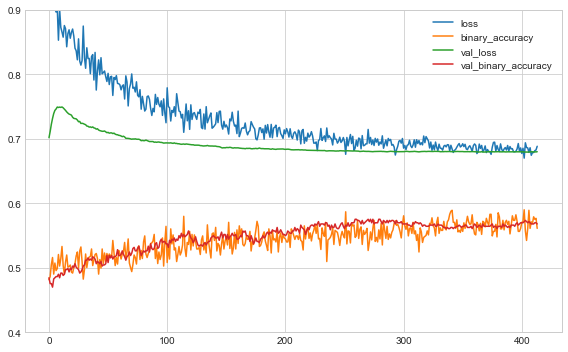

In [33]:
# Plots the training process
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 0.9)
plt.show()

In [34]:
# Evaluate the model
nn_model.evaluate(X_test_nn, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.6836 - binary_accuracy: 0.5795


[0.6836351752281189, 0.5795207023620605]

### Permutation importance for neural network

In [35]:
r = permutation_importance(nn_model, X_valid, y_valid,
                           n_repeats=30,
                           random_state=0,
                           scoring='r2')
print(nn_model.__class__.__name__)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - abs(r.importances_std[i]) > 0:
        print(f"{features[i]:<20}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Sequential
lat_encoded         0.016 +/- 0.006
B03_std_encoded     0.009 +/- 0.004
area_encoded        0.007 +/- 0.002
B05_std_encoded     0.007 +/- 0.003
B11_median_encoded  0.006 +/- 0.003
B05_median_encoded  0.005 +/- 0.003
B06_std_encoded     0.004 +/- 0.003
B8A_std_encoded     0.004 +/- 0.003


## Preformance measures

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

In [37]:
# Set the models
models = [log_clf, rnd_clf, svm_clf, voting_clf, nn_model]

In [38]:
def y_pred_models(models):
    '''Fits each model with the training data and predicts test data
    Returns a list with predictions for each model
    '''
    
    y_preds = []
    
    for model in models:
        model.fit(X_prep, y)
        y_pred = model.predict(X_test_cv)
        if model == nn_model:
            y_pred = (y_pred > 0.5)*1 #converts to binary predictions
        y_preds.append(y_pred)
        
    return y_preds


def y_prob_scores(models):
    '''Gets the probability that each model predicts for each class
    Returns a list with probability predictions for each model
    '''
    
    y_scores = []
    
    for model in models:
        if model != nn_model:
            y_pred_s = model.predict_proba(X_test_cv)
            y_score = y_pred_s[:, 1] 
        else:
            y_score = model.predict(X_test_cv)
        y_scores.append(y_score)
        
    return y_scores


y_preds = y_pred_models(models)
y_scores = y_prob_scores(models)

58/58 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.5643


#### Measure the time each model takes to fit the training data and predict the test data

In [39]:
for model in models:
    print(model.__class__.__name__)
    start = timeit.default_timer()
    model.fit(X_prep, y)
    stop = timeit.default_timer()
    print('Fit time:\t', stop - start)
    start = timeit.default_timer()
    y_pred = model.predict(X_test_cv)
    stop = timeit.default_timer()
    print('Predict time:\t', stop - start)
    print()

LogisticRegression
Fit time:	 0.057169100000010076
Predict time:	 0.0005540000000223699

RandomForestClassifier
Fit time:	 1.6002491999999506
Predict time:	 0.07640350000002627

SVC
Fit time:	 2.680960300000038
Predict time:	 0.03066430000001219

VotingClassifier
Fit time:	 4.029451999999992
Predict time:	 0.08600139999998646

Sequential
58/58 [==============================] - 0s 2ms/step - loss: 0.6969 - binary_accuracy: 0.5349
Fit time:	 0.18713120000001027
Predict time:	 0.0391648000000373



#### Prints confusion matrices for all models and is constructed as following:
[True neg, False neg]

[False pos, True pos]

In [40]:
for i in range(len(models)):
    print(models[i].__class__.__name__)
    print(confusion_matrix(y_test, y_preds[i]))
    print()

LogisticRegression
[[ 71 135]
 [ 50 203]]

RandomForestClassifier
[[ 84 122]
 [ 41 212]]

SVC
[[ 88 118]
 [ 72 181]]

VotingClassifier
[[ 64 142]
 [ 34 219]]

Sequential
[[ 35 171]
 [ 22 231]]



#### Calculates different measures derived from confusion matrices

In [41]:
for i in range(len(models)):
    print(models[i].__class__.__name__)
    print('Accuracy:\t', accuracy_score(y_test, y_preds[i]))
    print('Precision:\t', precision_score(y_test, y_preds[i]))
    print('Recall:\t\t', recall_score(y_test, y_preds[i]))
    print('F1:\t\t', f1_score(y_test, y_preds[i]))
    print('ROC AUC:\t', roc_auc_score(y_test, y_scores[i]))
    print('MCC:\t\t', matthews_corrcoef(y_test, y_preds[i]))
    print()

LogisticRegression
Accuracy:	 0.5969498910675382
Precision:	 0.6005917159763313
Recall:		 0.8023715415019763
F1:		 0.6869712351945854
ROC AUC:	 0.602210368778541
MCC:		 0.1659792964925735

RandomForestClassifier
Accuracy:	 0.644880174291939
Precision:	 0.6347305389221557
Recall:		 0.8379446640316206
F1:		 0.7223168654173766
ROC AUC:	 0.6413331286695576
MCC:		 0.2745309967014877

SVC
Accuracy:	 0.5860566448801743
Precision:	 0.6053511705685619
Recall:		 0.7154150197628458
F1:		 0.6557971014492753
ROC AUC:	 0.5946314133312867
MCC:		 0.14883882906939844

VotingClassifier
Accuracy:	 0.616557734204793
Precision:	 0.6066481994459834
Recall:		 0.8656126482213439
F1:		 0.7133550488599347
ROC AUC:	 0.6362293257607736
MCC:		 0.21397373964028737

Sequential
Accuracy:	 0.579520697167756
Precision:	 0.5746268656716418
Recall:		 0.9130434782608695
F1:		 0.7053435114503817
ROC AUC:	 0.5514601481254078
MCC:		 0.12509527621205263



#### Plots precision and recalls against different thresholds

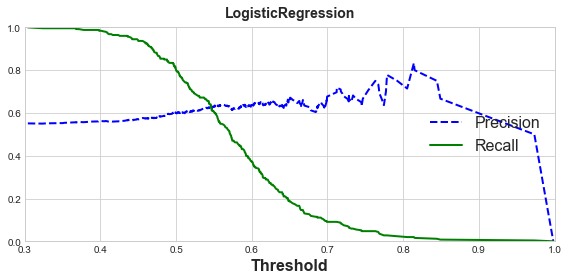

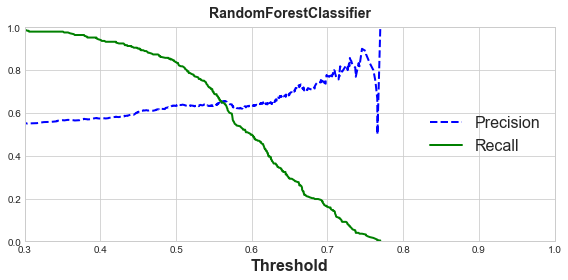

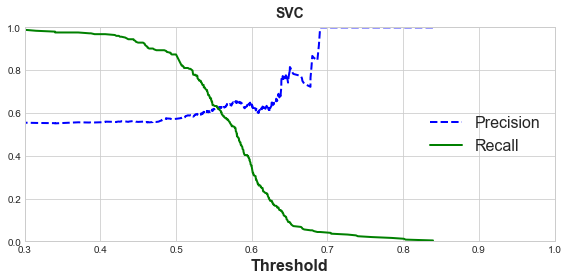

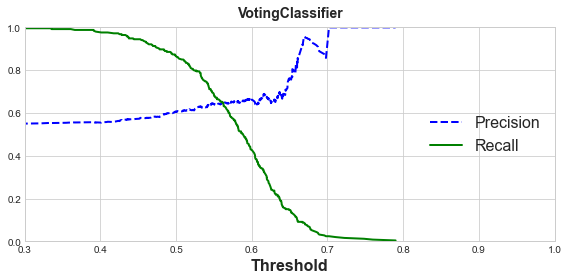

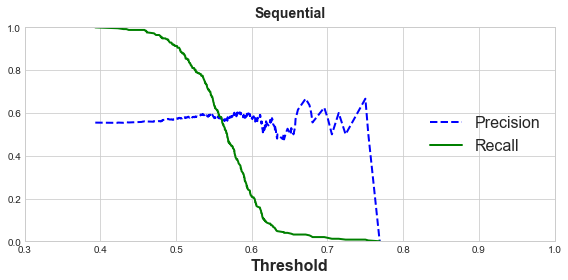

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([0.3, 1, 0, 1]) 
    plt.title(model.__class__.__name__)

for i in range(len(models)):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[i])
    plt.figure(figsize=(8, 4))                                                                  
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds, models[i])
    plt.show()

#### Plots precision against recall

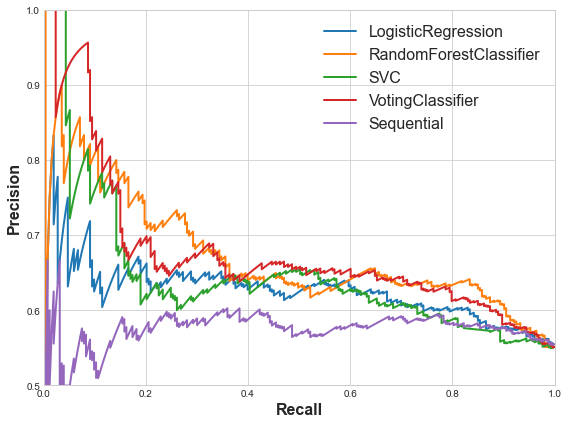

In [43]:
def plot_precision_vs_recall(precisions, recalls, label=None):
    plt.plot(recalls, precisions, linewidth=2, label=label)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0.5, 1])
    plt.grid(True)

    
plt.figure(figsize=(8, 6))

for i in range(len(models)):
    label = models[i].__class__.__name__
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[i])
    plot_precision_vs_recall(precisions, recalls, label)


plt.legend(loc="upper right", fontsize=16)
plt.show()

#### Plots ROC curves

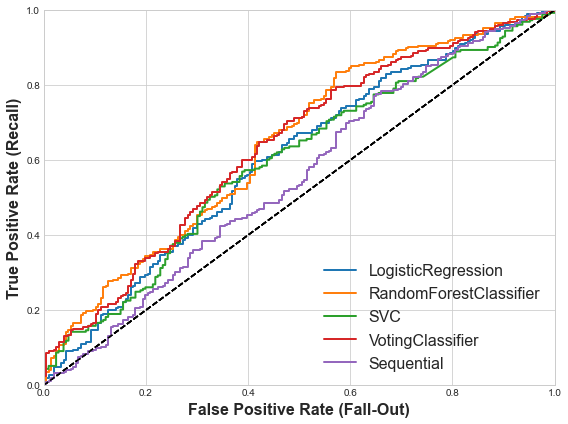

In [44]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            


plt.figure(figsize=(8, 6))

for i in range(len(models)):
    label = models[i].__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[i])
    plot_roc_curve(fpr, tpr, label)

plt.legend(loc="lower right", fontsize=16)
plt.show()
